In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 'normal' if x=='normal' else 'attack')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [4]:
df['suattempted'].value_counts()

,count
suattempted,
0,125893
2,59
1,21


In [5]:
# How many times was there an attack when su attempted
pd.pivot_table(data=df,index='suattempted',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
suattempted,,
0,58629.0,67264.0
1,1.0,20.0
2,NaN,59.0


In [6]:
pd.pivot_table(data=df,index='suattempted',columns='rootshell',values='duration',aggfunc='count')

rootshell,0,1
suattempted,,
0,125792.0,101.0
1,12.0,9.0
2,NaN,59.0


In [7]:
df[df['suattempted']>0]['attack'].value_counts()

,count
attack,
normal,79
spy,1


In [8]:
df[(df['suattempted'] == 1) & (df['rootshell'] == 0)]

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
405,7805,tcp,telnet,SF,1828,148722,0,0,0,1,2,1,19,0,1,10,8,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,51,7,0.14,0.08,0.02,0.00,0.00,0.00,0.00,0.00,normal,20,normal
2407,2670,tcp,telnet,SF,176,13070,0,0,0,0,0,1,2,0,1,2,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,65,0.25,0.02,0.00,0.00,0.99,0.98,0.00,0.00,normal,13,normal
5930,16800,tcp,telnet,SF,1970,101286,0,0,0,0,1,1,151,0,1,151,1,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,38,6,0.16,0.11,0.03,0.00,0.03,0.00,0.05,0.33,normal,19,normal
19052,5632,tcp,telnet,SF,3053,439262,0,0,0,2,0,1,193,0,1,191,1,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,121,26,0.21,0.05,0.01,0.00,0.01,0.04,0.02,0.08,normal,20,normal
19427,3916,tcp,telnet,SF,481,3431,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,14,0.36,0.10,0.03,0.00,0.00,0.00,0.05,0.14,normal,20,normal
22114,0,tcp,telnet,S1,1151,8390,0,0,0,0,1,1,4,0,1,3,5,0,0,0,0,0,1,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,101,23,0.23,0.06,0.01,0.00,0.02,0.09,0.08,0.35,normal,15,normal
33702,18848,tcp,telnet,SF,2327,418769,0,0,0,0,0,1,281,0,1,278,1,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,50,0.20,0.02,0.00,0.00,0.36,0.46,0.00,0.00,normal,13,normal
48702,4048,tcp,telnet,SF,353,18600,0,0,0,1,0,1,121,0,1,123,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,1,0.00,0.37,0.00,0.00,0.00,0.00,0.00,0.00,normal,20,normal
58705,3138,tcp,telnet,RSTO,329,205950,0,0,0,0,1,1,4,0,1,3,0,0,0,0,0,0,1,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,92,22,0.24,0.07,0.01,0.00,0.01,0.05,0.09,0.36,normal,17,normal
64331,337,tcp,telnet,SF,237,1540,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,47,0.18,0.02,0.00,0.00,0.22,0.32,0.00,0.00,spy,5,attack


In [9]:
pd.pivot_table(data=df,index='suattempted',columns='loggedin',values='duration',aggfunc='count')

loggedin,0,1
suattempted,,
0,76121.0,49772.0
1,NaN,21.0
2,NaN,59.0


In [10]:
sdf = df.copy()
sdf['is_hot'] = sdf['hot'].apply(lambda x: 1 if x > 0 else 0)
pd.pivot_table(data=sdf,index='suattempted',columns='is_hot',values='loggedin',aggfunc='count')

is_hot,0,1
suattempted,,
0,123231,2662
1,16,5
2,55,4


In [11]:
pd.pivot_table(data=sdf,index='loggedin',columns='is_hot',values='duration',aggfunc='count')

is_hot,0,1
loggedin,,
0,76031,90
1,47271,2581


In [12]:
pd.pivot_table(data=df,index='suattempted',columns='numfailedlogins',values='loggedin',aggfunc='count')

numfailedlogins,0,1,2,3,4,5
suattempted,,,,,,
0,125780.0,98.0,7.0,4.0,3.0,1.0
1,15.0,5.0,1.0,NaN,NaN,NaN
2,56.0,1.0,1.0,1.0,NaN,NaN


In [13]:
df['numroot'].value_counts()

,count
numroot,
0,125324
1,273
9,121
6,99
2,33
...,...
684,1
47,1
278,1


In [14]:
df['numroot'].nunique()

82

In [15]:
df[df['numroot'] > 0].value_counts().sum()

649

In [16]:
np.percentile(df['numroot'],75),np.percentile(df['numroot'],50),np.percentile(df['numroot'],25)

(0.0, 0.0, 0.0)

In [17]:
np.percentile(df['numroot'],99)

0.0

<Axes: xlabel='numroot', ylabel='Density'>

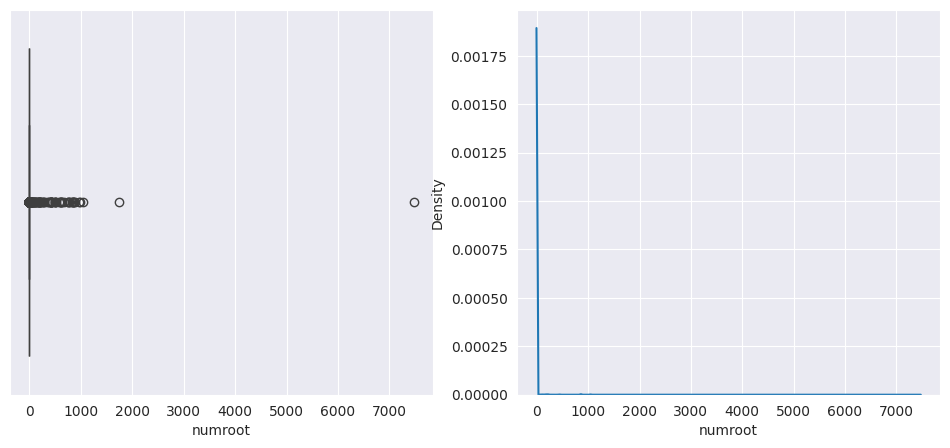

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='numroot')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='numroot')

In [19]:
pd.DataFrame(df['numroot'].describe()).T

,count,mean,std,min,25%,50%,75%,max
numroot,125973.0,0.302192,24.399618,0.0,0.0,0.0,0.0,7468.0


In [20]:
nrdf = df.copy()
nrdf['login_failed'] = nrdf['numfailedlogins'].apply(lambda x: 0 if x == 0 else 1)
nrdf['is_hot'] = nrdf['hot'].apply(lambda x: 1 if x > 0 else 0)
nrdf['is_compromised'] = nrdf['numcompromised'].apply(lambda x: 1 if x > 0 else 0)
nrdf['nroot'] = nrdf['numroot'].apply(lambda x: 1 if x > 0 else 0)

In [21]:
pd.pivot_table(data=nrdf,index='nroot',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
nroot,,
0,58611,66713
1,19,630


In [25]:
pd.pivot_table(data=nrdf,index='nroot',columns='loggedin',values='duration',aggfunc='count')

loggedin,0,1
nroot,,
0,76121.0,49203.0
1,NaN,649.0


In [75]:
pd.pivot_table(data=nrdf,index='nroot',columns='rootshell',values='duration',aggfunc='count')

rootshell,0,1
nroot,,
0,125237,87
1,567,82


In [79]:
pd.pivot_table(data=nrdf,index='nroot',columns='suattempted',values='duration',aggfunc='count')

suattempted,0,1,2
nroot,,,
0,125322.0,2.0,NaN
1,571.0,19.0,59.0


In [85]:
nrdf[(nrdf['numroot'] > 0) & (nrdf['attack'] != 'normal')]['rootshell']

,rootshell
3005,1
3173,1
11448,0
25095,0
36730,0
37270,1
47343,0
59000,0
66007,1
69147,1


In [73]:
nrdf.groupby(['is_attack','is_hot'])['nroot'].sum()

is_attack  is_hot
attack     0          13
           1           6
normal     0         611
           1          19
Name: nroot, dtype: int64

In [62]:
pd.pivot_table(data=nrdf,index='attack',columns='nroot',values='duration',aggfunc='count').reset_index().sort_values(1,ascending=False).head(12)

nroot,attack,0,1
11,normal,66713.0,630.0
16,rootkit,6.0,4.0
12,perl,NaN,3.0
17,satan,3630.0,3.0
1,buffer_overflow,28.0,2.0
2,ftp_write,6.0,2.0
8,multihop,5.0,2.0
4,imap,10.0,1.0
5,ipsweep,3598.0,1.0
7,loadmodule,8.0,1.0


In [24]:
nrdf[nrdf['attack'] != 'normal']['numroot'].value_counts().sort_index()

,count
numroot,
0,58611
1,6
2,4
3,1
4,3
7,1
14,1
16,1
39,1


In [56]:
nrdf[nrdf['numroot']==0].shape

(125324, 49)

In [58]:
nrdf['bins'] = None

for i in range(len(nrdf)):
  nr = nrdf.loc[i,'numroot']
  if nr == 0:
    nrdf.loc[i,'bins'] = 0
  if nr > 0 and nr <= 100:
    nrdf.loc[i,'bins'] = 1
  elif nr> 100 and nr <= 200:
    nrdf.loc[i,'bins'] = 2
  elif nr> 200 and nr <= 300:
    nrdf.loc[i,'bins'] = 3
  elif nr > 300 and nr <= 400:
    nrdf.loc[i,'bins'] = 4
  elif nr > 400 and nr <= 500:
    nrdf.loc[i,'bins'] = 4
  elif nr > 500 and nr <= 600:
    nrdf.loc[i,'bins'] = 5
  elif nr > 600 and nr <= 700:
    nrdf.loc[i,'bins'] = 6
  elif nr > 700 and nr <= 800:
    nrdf.loc[i,'bins'] = 7
  elif nr > 800 and nr <= 900:
    nrdf.loc[i,'bins'] = 8
  elif nr > 900 and nr <= 1000:
    nrdf.loc[i,'bins'] = 9
  elif nr > 1000:
    nrdf.loc[i,'bins'] = 10


In [60]:
pd.pivot_table(data=nrdf[nrdf['bins'] != 0],index='attack',columns='bins',values='duration',aggfunc='count')

bins,1,2,3,4,5,6,7,8,9,10
attack,,,,,,,,,,
buffer_overflow,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ftp_write,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imap,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ipsweep,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loadmodule,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multihop,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
normal,574.0,11.0,8.0,11.0,5.0,6.0,4.0,6.0,2.0,3.0
perl,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rootkit,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
pd.DataFrame(df['numfilecreations'].value_counts().sort_index()).T

numfilecreations,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,33,34,36,38,40,43
count,125686,151,41,5,13,5,3,4,5,2,5,4,4,2,3,5,1,5,4,1,3,1,1,2,3,3,1,1,1,1,1,1,1,3,1


In [89]:
df[df['numfilecreations'] > 0]['numfilecreations'].sum()

1596

<Axes: xlabel='numfilecreations', ylabel='Density'>

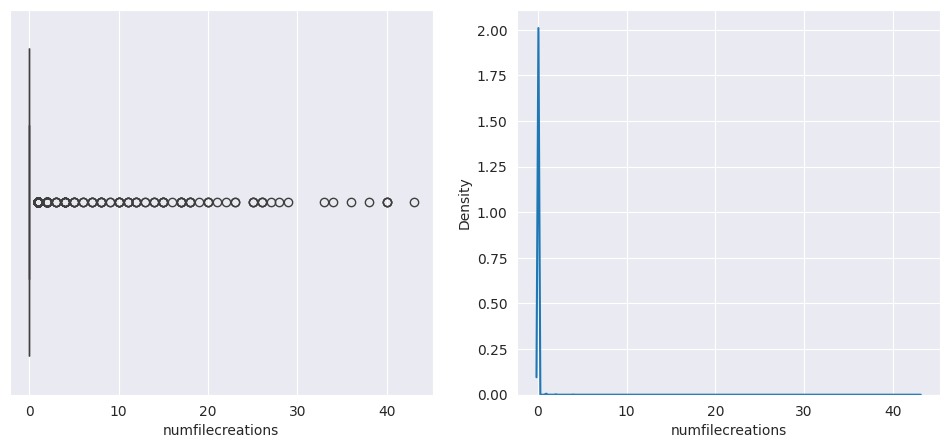

In [90]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='numfilecreations')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='numfilecreations')

In [91]:
np.percentile(df['numfilecreations'],75),np.percentile(df['numfilecreations'],50),np.percentile(df['numfilecreations'],25)

(0.0, 0.0, 0.0)

In [93]:
np.percentile(df['numfilecreations'],99)

0.0

In [112]:
fcdf = df.copy()
fcdf['login_failed'] = fcdf['numfailedlogins'].apply(lambda x: 0 if x == 0 else 1)
fcdf['is_hot'] = fcdf['hot'].apply(lambda x: 1 if x > 0 else 0)
fcdf['is_compromised'] = fcdf['numcompromised'].apply(lambda x: 1 if x > 0 else 0)
fcdf['nroot'] = fcdf['numroot'].apply(lambda x: 1 if x > 0 else 0)
fcdf['fc'] = fcdf['numfilecreations'].apply(lambda x: 1 if x > 0 else 0)
fcdf['attk'] = fcdf['attack'].apply(lambda x: 0 if x == 'normal' else 1)

In [113]:
fcdf['bins'] = None

for i in range(len(fcdf)):
  fc = fcdf.loc[i,'numfilecreations']
  if fc == 0:
    fcdf.loc[i,'bins'] = 0
  if fc > 0 and fc <= 10:
    fcdf.loc[i,'bins'] = 1
  elif fc> 10 and fc <= 20:
    fcdf.loc[i,'bins'] = 2
  elif fc> 20 and fc <= 30:
    fcdf.loc[i,'bins'] = 3
  elif fc > 30 and fc <= 40:
    fcdf.loc[i,'bins'] = 4

In [114]:
fcdf['bins'].value_counts()

,count
bins,
0,125686
1,234
2,32
3,13
4,7


In [115]:
pd.pivot_table(data=fcdf,index='bins',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
bins,,
0,58596.0,67090.0
1,32.0,202.0
2,1.0,31.0
3,1.0,12.0
4,NaN,7.0


In [123]:
pd.pivot_table(data=fcdf,index='fc',columns='loggedin',values='attk',aggfunc='sum')

loggedin,0,1
fc,,
0,56634,1962
1,1,33


In [117]:
pd.pivot_table(data=fcdf,index='fc',columns='is_hot',values='duration',aggfunc='count')

is_hot,0,1
fc,,
0,123067,2619
1,235,52


In [121]:
pd.pivot_table(data=fcdf,index='fc',columns='is_hot',values='attk',aggfunc='sum')

is_hot,0,1
fc,,
0,57205,1391
1,10,24


In [120]:
pd.pivot_table(data=fcdf,index='fc',columns='is_compromised',values='attk',aggfunc='count')

is_compromised,0,1
fc,,
0,124470,1216
1,217,70


In [119]:
pd.pivot_table(data=fcdf,index='fc',columns='is_compromised',values='attk',aggfunc='sum')

is_compromised,0,1
fc,,
0,57697,899
1,19,15


In [124]:
pd.pivot_table(data=fcdf,index='fc',columns='rootshell',values='attk',aggfunc='count')

rootshell,0,1
fc,,
0,125547,139
1,257,30


In [125]:
pd.pivot_table(data=fcdf,index='fc',columns='rootshell',values='attk',aggfunc='sum')

rootshell,0,1
fc,,
0,58580,16
1,18,16


In [103]:
pd.pivot_table(data=fcdf[(fcdf['attack'] != 'normal') & (fcdf['bins'] != 0)],index='attack',columns='bins',values='duration',aggfunc='count')

bins,1,2,3
attack,,,
buffer_overflow,13.0,NaN,NaN
ftp_write,2.0,NaN,NaN
ipsweep,NaN,1.0,NaN
loadmodule,4.0,NaN,NaN
multihop,4.0,NaN,NaN
perl,3.0,NaN,NaN
rootkit,3.0,NaN,NaN
satan,1.0,NaN,NaN
spy,1.0,NaN,NaN


In [109]:
df[df['attack'] == 'buffer_overflow'].shape

(30, 44)

In [126]:
df['numshells'].value_counts()

,count
numshells,
0,125926
1,42
2,5


In [127]:
shdf = df.copy()
shdf['login_failed'] = shdf['numfailedlogins'].apply(lambda x: 0 if x == 0 else 1)
shdf['is_hot'] = shdf['hot'].apply(lambda x: 1 if x > 0 else 0)
shdf['is_compromised'] = shdf['numcompromised'].apply(lambda x: 1 if x > 0 else 0)
shdf['nroot'] = shdf['numroot'].apply(lambda x: 1 if x > 0 else 0)
shdf['fc'] = shdf['numfilecreations'].apply(lambda x: 1 if x > 0 else 0)
shdf['attk'] = shdf['attack'].apply(lambda x: 0 if x == 'normal' else 1)

In [133]:
pd.pivot_table(data=shdf,index='numshells',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
numshells,,
0,58622,67304
1,5,37
2,3,2


In [134]:
pd.pivot_table(data=shdf,index='numshells',columns='is_attack',values='attk',aggfunc='sum')

is_attack,attack,normal
numshells,,
0,58622,0
1,5,0
2,3,0


In [135]:
pd.pivot_table(data=shdf,index='numshells',columns='loggedin',values='duration',aggfunc='count')

loggedin,0,1
numshells,,
0,76121.0,49805.0
1,NaN,42.0
2,NaN,5.0


In [136]:
pd.pivot_table(data=shdf,index='numshells',columns='loggedin',values='attk',aggfunc='sum')

loggedin,0,1
numshells,,
0,56635.0,1987.0
1,NaN,5.0
2,NaN,3.0


In [137]:
pd.pivot_table(data=shdf,index='numshells',columns='is_hot',values='duration',aggfunc='count')

is_hot,0,1
numshells,,
0,123261.0,2665.0
1,41.0,1.0
2,NaN,5.0


In [139]:
pd.pivot_table(data=shdf,index='numshells',columns='is_hot',values='attk',aggfunc='sum')

is_hot,0,1
numshells,,
0,57211.0,1411.0
1,4.0,1.0
2,NaN,3.0


In [140]:
pd.pivot_table(data=shdf,index='numshells',columns='is_compromised',values='duration',aggfunc='count')

is_compromised,0,1
numshells,,
0,124646.0,1280.0
1,41.0,1.0
2,NaN,5.0


In [141]:
pd.pivot_table(data=shdf,index='numshells',columns='is_compromised',values='attk',aggfunc='sum')

is_compromised,0,1
numshells,,
0,57712.0,910.0
1,4.0,1.0
2,NaN,3.0


In [148]:
pd.pivot_table(data=shdf,index='numshells',columns='fc',values='attk',aggfunc='sum')

fc,0,1
numshells,,
0,58596.0,26.0
1,0.0,5.0
2,NaN,3.0


In [144]:
pd.pivot_table(data=shdf[(shdf['numshells'] != 0) &(shdf['attack'] != 'normal')],index='attack',columns='numshells',values='attk',aggfunc='sum')

numshells,1,2
attack,,
loadmodule,NaN,2.0
multihop,1.0,1.0
perl,3.0,NaN
spy,1.0,NaN


In [149]:
df['numaccessfiles'].value_counts()

,count
numaccessfiles,
0,125602
1,313
2,29
3,8
5,6
4,5
6,4
8,3
7,2


In [150]:
acdf = df.copy()
acdf['login_failed'] = acdf['numfailedlogins'].apply(lambda x: 0 if x == 0 else 1)
acdf['is_hot'] = acdf['hot'].apply(lambda x: 1 if x > 0 else 0)
acdf['is_compromised'] = acdf['numcompromised'].apply(lambda x: 1 if x > 0 else 0)
acdf['nroot'] = acdf['numroot'].apply(lambda x: 1 if x > 0 else 0)
acdf['fc'] = acdf['numfilecreations'].apply(lambda x: 1 if x > 0 else 0)
acdf['attk'] = acdf['attack'].apply(lambda x: 0 if x == 'normal' else 1)
acdf['num_access'] = acdf['numaccessfiles'].apply(lambda x: 0 if x ==0  else 1)

In [151]:
acdf['num_access'].value_counts()

,count
num_access,
0,125602
1,371


In [152]:
pd.pivot_table(data=acdf,index='num_access',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
num_access,,
0,58620,66982
1,10,361


In [154]:
pd.pivot_table(data=acdf,index='numaccessfiles',columns='is_attack',values='attk',aggfunc='sum')

is_attack,attack,normal
numaccessfiles,,
0,58620.0,0.0
1,9.0,0.0
2,1.0,0.0
3,NaN,0.0
4,NaN,0.0
5,NaN,0.0
6,NaN,0.0
7,NaN,0.0
8,NaN,0.0


In [157]:
pd.pivot_table(data=acdf,index='attack',columns='num_access',values='duration',aggfunc='count').reset_index().sort_values(1,ascending=False).head(7)

num_access,attack,0,1
11,normal,66982.0,361.0
13,phf,NaN,4.0
2,ftp_write,5.0,3.0
7,loadmodule,8.0,1.0
8,multihop,6.0,1.0
19,spy,1.0,1.0
0,back,956.0,NaN


In [169]:
pd.pivot_table(data=acdf,index='attack',columns='numaccessfiles',values='attk',aggfunc='sum')

numaccessfiles,0,1,2,3,4,5,6,7,8,9
attack,,,,,,,,,,
back,956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buffer_overflow,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ftp_write,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guess_passwd,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imap,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ipsweep,3599.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loadmodule,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multihop,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
pd.pivot_table(data=acdf,index='num_access',columns='loggedin',values='duration',aggfunc='count')

loggedin,0,1
num_access,,
0,76121.0,49481.0
1,NaN,371.0


In [161]:
pd.pivot_table(data=acdf,index='num_access',columns='loggedin',values='attk',aggfunc='sum')

loggedin,0,1
num_access,,
0,56635.0,1985.0
1,NaN,10.0


In [162]:
pd.pivot_table(data=acdf,index='num_access',columns='is_hot',values='duration',aggfunc='count')

is_hot,0,1
num_access,,
0,122941,2661
1,361,10


In [163]:
pd.pivot_table(data=acdf,index='num_access',columns='is_hot',values='attk',aggfunc='sum')

is_hot,0,1
num_access,,
0,57213,1407
1,2,8


In [165]:
pd.pivot_table(data=acdf,index='num_access',columns='is_compromised',values='duration',aggfunc='count')

is_compromised,0,1
num_access,,
0,124383,1219
1,304,67


In [166]:
pd.pivot_table(data=acdf,index='num_access',columns='is_compromised',values='attk',aggfunc='sum')

is_compromised,0,1
num_access,,
0,57709,911
1,7,3


In [170]:
pd.pivot_table(data=acdf,index='num_access',columns='suattempted',values='duration',aggfunc='count')

suattempted,0,1,2
num_access,,,
0,125570,17,15
1,323,4,44


In [171]:
pd.pivot_table(data=acdf,index='num_access',columns='suattempted',values='attk',aggfunc='sum')

suattempted,0,1,2
num_access,,,
0,58620,0,0
1,9,1,0


In [175]:
pd.pivot_table(data=acdf,index='num_access',columns='numshells',values='attk',aggfunc='sum')

numshells,0,1,2
num_access,,,
0,58615,3,2
1,7,2,1


In [176]:
pd.pivot_table(data=acdf,index='num_access',columns='rootshell',values='attk',aggfunc='sum')

rootshell,0,1
num_access,,
0,58594,26
1,4,6


In [177]:
df['numoutboundcmds'].value_counts()

,count
numoutboundcmds,
0,125973


In [178]:
df.shape

(125973, 44)

In [179]:
df['ishostlogin'].value_counts()

,count
ishostlogin,
0,125972
1,1


In [180]:
df[df['ishostlogin'] == 1]

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
82775,49,tcp,telnet,SF,187,7751,0,0,0,1,0,1,10,0,0,10,0,0,0,0,1,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,18,0.07,0.58,0.0,0.0,0.58,0.17,0.0,0.06,normal,17,normal


In [181]:
df['isguestlogin'].value_counts()

,count
isguestlogin,
0,124786
1,1187


In [182]:
gstdf = df.copy()
gstdf['login_failed'] = gstdf['numfailedlogins'].apply(lambda x: 0 if x == 0 else 1)
gstdf['is_hot'] = gstdf['hot'].apply(lambda x: 1 if x > 0 else 0)
gstdf['is_compromised'] = gstdf['numcompromised'].apply(lambda x: 1 if x > 0 else 0)
gstdf['nroot'] = gstdf['numroot'].apply(lambda x: 1 if x > 0 else 0)
gstdf['fc'] = gstdf['numfilecreations'].apply(lambda x: 1 if x > 0 else 0)
gstdf['attk'] = gstdf['attack'].apply(lambda x: 0 if x == 'normal' else 1)
gstdf['num_access'] = gstdf['numaccessfiles'].apply(lambda x: 0 if x ==0  else 1)

In [183]:
pd.pivot_table(data=gstdf,index='isguestlogin',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
isguestlogin,,
0,58316,66470
1,314,873


In [184]:
pd.pivot_table(data=gstdf,index='isguestlogin',columns='is_attack',values='attk',aggfunc='sum')

is_attack,attack,normal
isguestlogin,,
0,58316,0
1,314,0


In [187]:
pd.pivot_table(data=gstdf,index='attack',columns='isguestlogin',values='duration',aggfunc='count').reset_index().sort_values(1,ascending=False).head(7)

isguestlogin,attack,0,1
11,normal,66470.0,873.0
21,warezclient,584.0,306.0
2,ftp_write,6.0,2.0
8,multihop,5.0,2.0
22,warezmaster,18.0,2.0
3,guess_passwd,52.0,1.0
17,satan,3632.0,1.0


In [189]:
pd.pivot_table(data=gstdf,index='attack',columns='isguestlogin',values='attk',aggfunc='sum').reset_index().sort_values(1,ascending=False).head(7)

isguestlogin,attack,0,1
21,warezclient,584.0,306.0
2,ftp_write,6.0,2.0
8,multihop,5.0,2.0
22,warezmaster,18.0,2.0
3,guess_passwd,52.0,1.0
17,satan,3632.0,1.0
11,normal,0.0,0.0


In [190]:
pd.pivot_table(data=gstdf,index='isguestlogin',columns='loggedin',values='duration',aggfunc='count')

loggedin,0,1
isguestlogin,,
0,76116,48670
1,5,1182


In [195]:
pd.pivot_table(data=gstdf,index='isguestlogin',columns='loggedin',values='attk',aggfunc='count')

loggedin,0,1
isguestlogin,,
0,76116,48670
1,5,1182


In [196]:
pd.pivot_table(data=gstdf,index='isguestlogin',columns='is_hot',values='attk',aggfunc='count')

is_hot,0,1
isguestlogin,,
0,123294,1492
1,8,1179


In [197]:
pd.pivot_table(data=gstdf,index='isguestlogin',columns='is_hot',values='attk',aggfunc='sum')

is_hot,0,1
isguestlogin,,
0,57214,1102
1,1,313


In [198]:
pd.pivot_table(data=gstdf,index='isguestlogin',columns='is_compromised',values='attk',aggfunc='count')

is_compromised,0,1
isguestlogin,,
0,123500.0,1286.0
1,1187.0,NaN


In [200]:
pd.pivot_table(data=gstdf,index='isguestlogin',columns='rootshell',values='attk',aggfunc='count')

rootshell,0,1
isguestlogin,,
0,124617.0,169.0
1,1187.0,NaN


In [201]:
pd.pivot_table(data=gstdf,index='isguestlogin',columns='suattempted',values='attk',aggfunc='count')

suattempted,0,1,2
isguestlogin,,,
0,124706.0,21.0,59.0
1,1187.0,NaN,NaN


In [206]:
pd.pivot_table(data=gstdf,index='isguestlogin',columns='num_access',values='attk',aggfunc='count')

num_access,0,1
isguestlogin,,
0,124417,369
1,1185,2


In [205]:
pd.pivot_table(data=gstdf,index='isguestlogin',columns='fc',values='attk',aggfunc='sum')

fc,0,1
isguestlogin,,
0,58289,27
1,307,7


In [207]:
pd.pivot_table(data=gstdf,index='isguestlogin',columns='fc',values='attk',aggfunc='count')

fc,0,1
isguestlogin,,
0,124506,280
1,1180,7
